# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Reza Ubaidillah
- **Email:** muhammadrezaubaidillah15@gmail.com
- **ID Dicoding:** rezaubaidillah

## Menentukan Pertanyaan Bisnis

- Apa hubungan keaadan cuaca, musim, waktu,hari kerja atau tidak, libur atau tidak, hari terhadap perental sepeda?
- Pada waktu mana terjadi lonjakan dan penurunan jumlah perental  , sehingga perental dapat menyediakan jumlah sepeda yang tepat untuk memenuhi permintaan?

## Import Semua Packages/Library yang Digunakan

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [211]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [212]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [213]:
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- data day_df adalah data berdasarkan hari
- data hour_df adalah data berdasarkan waktu jam, merupakan detail dari day_csv berdasarkan jam

**Sehingga kita akan menggunakan hour csv karena memiliki kolom tanggal dan memiliki tambahan kolom waktu**

### Assessing Data

Mencari informasi dataframe

In [214]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- dteday harus kita ubah ke tipe datetime
- penamaan variabel kolom harus kita ganti agar lebih jelas

Mencari Missing Value

In [215]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


tidak memiliki missing value

Mencari Duplicate Data

In [216]:
hour_df.duplicated().sum()

0

tidak memiliki duplicated data

deskripsi statistik untuk setiap kolum


In [217]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


melihat apakah semua baris pada hour_df kolom cnt memiliki nilai yang sama dengan penjumlahan casual dan registered

In [218]:
comparison_result = hour_df['cnt'] == hour_df['casual'] + hour_df['registered']

print(comparison_result.all())  # True if all rows are equal, False otherwise


True


mencari outlier

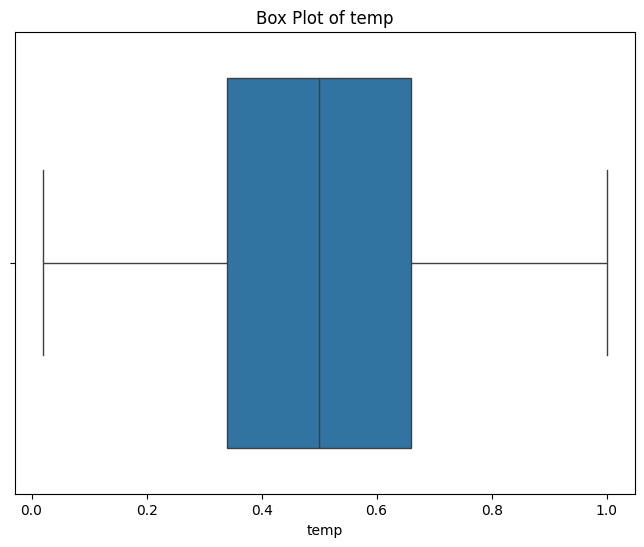

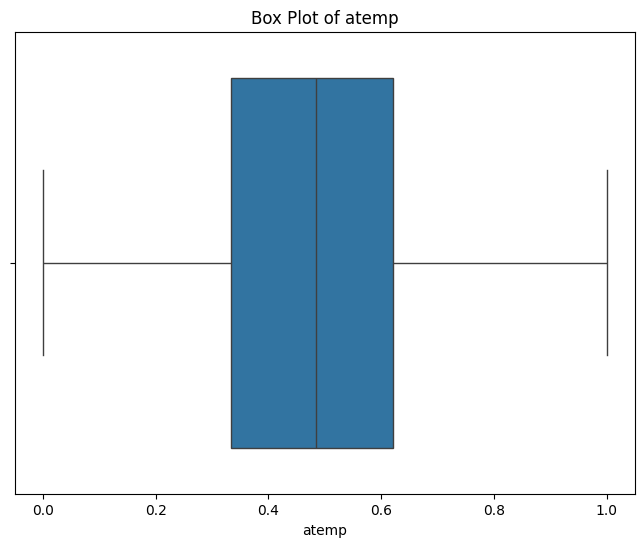

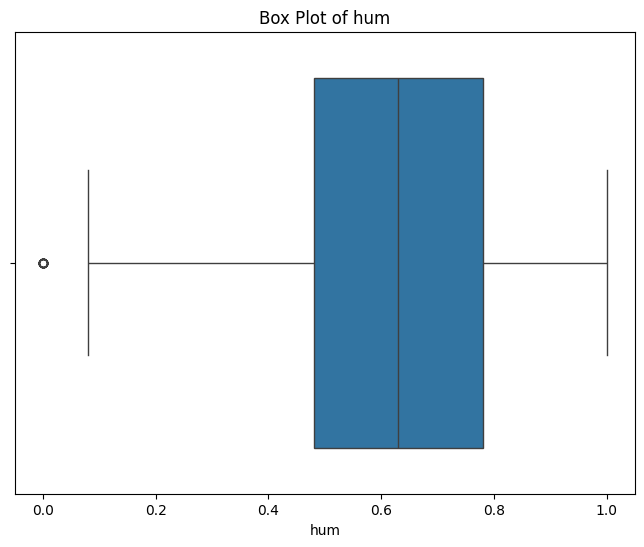

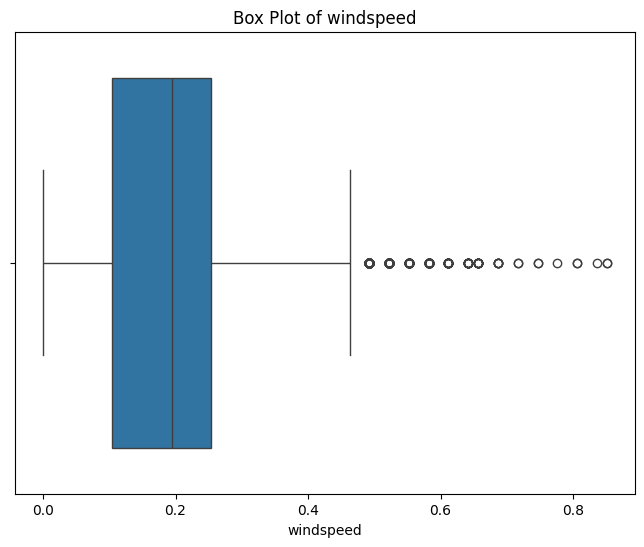

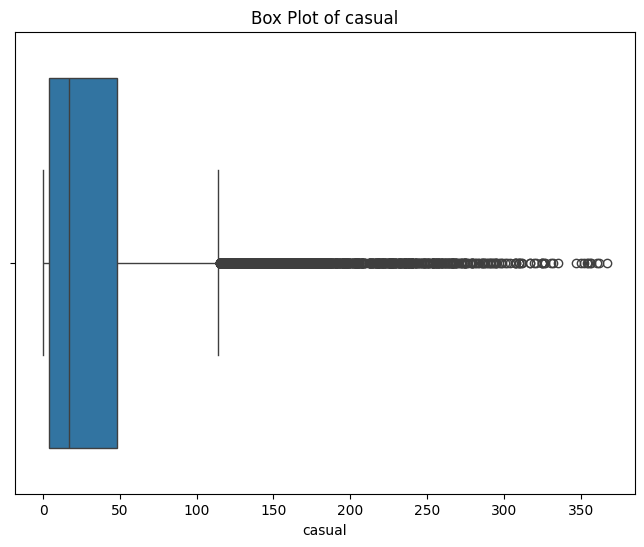

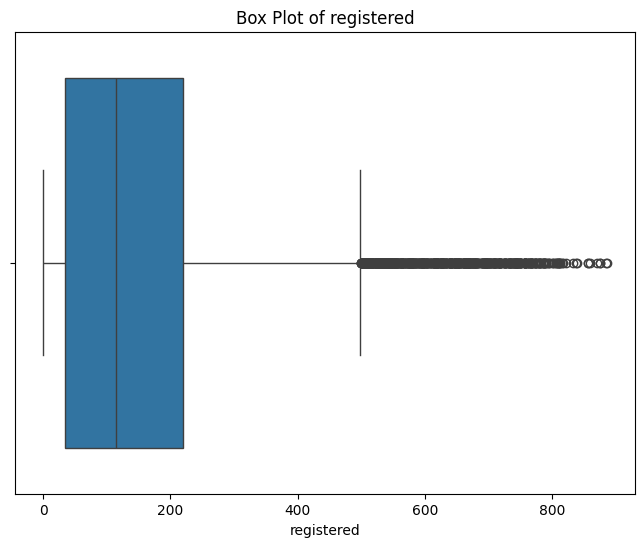

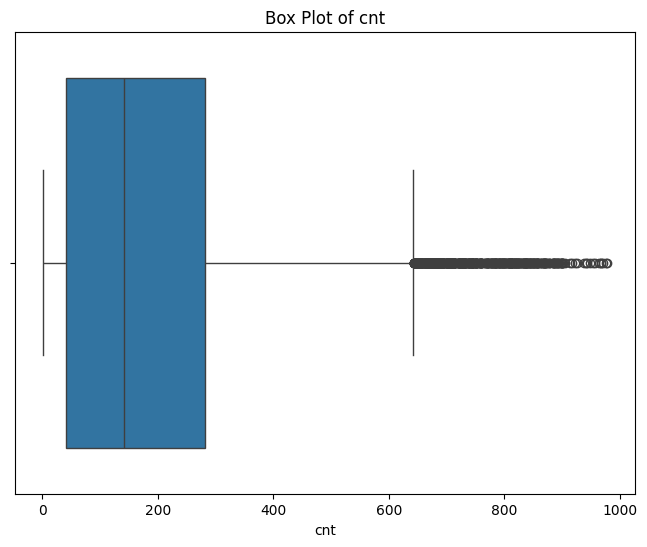

Outliers found in hum: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Outliers found in windspeed: [0.4925, 0.5522, 0.5224, 0.5224, 0.5821, 0.5224, 0.5821, 0.5821, 0.5224, 0.5224, 0.5522, 0.4925, 0.5522, 0.5224, 0.4925, 0.4925, 0.5522, 0.4925, 0.5224, 0.5821, 0.5224, 0.4925, 0.6567, 0.6119, 0.6119, 0.4925, 0.5224, 0.6567, 0.4925, 0.7761, 0.6866, 0.5224, 0.5821, 0.4925, 0.4925, 0.5224, 0.5821, 0.6567, 0.5821, 0.5821, 0.4925, 0.6119, 0.6567, 0.7463, 0.6418, 0.6119, 0.5224, 0.5522, 0.4925, 0.5522, 0.5522, 0.5522, 0.6119, 0.806, 0.7463, 0.4925, 0.6119, 0.4925, 0.6119, 0.6119, 0.4925, 0.5224, 0.5522, 0.5224, 0.4925, 0.4925, 0.6119, 0.5821, 0.5224, 0.5821, 0.4925, 0.4925, 0.4925, 0.6418, 0.4925, 0.4925, 0.5522, 0.5224, 0.6119, 0.4925, 0.5522, 0.4925, 0.5821, 0.4925, 0.4925, 0.4925, 0.5224, 0.4925, 0.5224, 0.5224, 0.5224, 0.5224, 0.4925, 0.5224, 0.4925, 0.5821, 0.5224, 0.5821, 0.5821, 0.5821, 0.5224, 0.5522, 0.5821, 0.4925, 0.492

In [219]:


numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=hour_df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()


def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for feature in numerical_features:
  outliers = detect_outliers_iqr(hour_df[feature])
  if not outliers.empty:
    print(f"Outliers found in {feature}: {outliers.tolist()}")


outlier memiliki angka yang valid dan tidak ada kesalahan dalam menginput data

**Insight:**
- data day_csv tidak memiliki missing value
- data day_csv tidak memiliki duplicate data
- data day_csv memiliki tipe data yang salah pada dteday yang seharusnya datetime bukan object
- data memiliki nama kolom yang disingkat
- data memiliki outlier yang valid
- data memiliki cnt yang benar
- data kolom hour memiliki rentang 0 - 23
- data kolom season memiliki rentang 1 - 4
- data kolom weathersit memiliki rentang 1 - 4



### Cleaning Data

mengubah type dteday menjadi datetime

In [220]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

mengubah nama setiap variabel kolom agar lebih jelas


In [221]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'date',
                        'holiday':'is_holiday',
                        'weekday':'day',
                        'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                        'hr':'hour',
                       'yr':'year'},inplace=True)

melihat informasi setelah kita cleaning


In [222]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   day                17379 non-null  int64         
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

**Insight:**
- mengubah tipe datetime dari object menjadi datetime
- mengubah penamaan kolom sehingga mudah dimengerti



## Exploratory Data Analysis (EDA)

### Explore Kondisi cuaca terhadap jumlah perental


In [223]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi cuaca
mean_total_count = hour_df.groupby('weather_condition')['total_count'].mean()

# Tentukan kondisi cuaca dengan rata-rata peminjaman tertinggi
max_mean_weather = mean_total_count.idxmax()
print(mean_total_count)


weather_condition
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: total_count, dtype: float64


In [224]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi cuaca
max_total_count = hour_df.groupby('weather_condition')['total_count'].max()

# Tentukan kondisi cuaca dengan nilai tertinggi peminjaman tertinggi
max_weather = max_total_count.idxmax()
print(max_total_count)

weather_condition
1    977
2    957
3    891
4    164
Name: total_count, dtype: int64


### Explore Kondisi waktu terhadap jumlah perental


 menambahkan fitur baru, rentang waktu (pagi, siang, sore, malam) berdasarkan jam.

In [225]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 21:
        return "Evening"
    else:
        return "Night"

hour_df['time_of_day'] = hour_df['hour'].apply(time_of_day)

In [226]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi waktu
mean_total_count = hour_df.groupby('time_of_day')['total_count'].mean()

# Tentukan kondisi waktu dengan rata-rata peminjaman tertinggi
max_mean_time_of_day = mean_total_count.idxmax()
print(mean_total_count)


time_of_day
Afternoon    295.483886
Evening      321.021520
Morning      181.520583
Night         65.687968
Name: total_count, dtype: float64


In [227]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi waktu
max_total_count = hour_df.groupby('time_of_day')['total_count'].max()

# Tentukan kondisi waktu dengan nilai tertinggi peminjaman tertinggi
max_time_of_day = max_total_count.idxmax()
print(max_total_count)

time_of_day
Afternoon    976
Evening      977
Morning      839
Night        584
Name: total_count, dtype: int64


### Explore hari kerja atau tidak terhadap jumlah perental


In [228]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi hari kerja atau tidak
mean_total_count = hour_df.groupby('is_workingday')['total_count'].mean()

# Tentukan kondisi hari kerja atau tidak dengan rata-rata peminjaman tertinggi
max_mean_is_workingday = mean_total_count.idxmax()
print(mean_total_count)

is_workingday
0    181.405332
1    193.207754
Name: total_count, dtype: float64


In [229]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi hari kerja atau tidak
max_total_count = hour_df.groupby('is_workingday')['total_count'].max()

# Tentukan kondisi hari kerja atau tidak dengan nilai tertinggi peminjaman tertinggi
max_is_workingday = max_total_count.idxmax()
print(max_total_count)

is_workingday
0    783
1    977
Name: total_count, dtype: int64


### Explore libur atau tidak terhadap jumlah perental


In [230]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi hari libur
mean_total_count = hour_df.groupby('is_holiday')['total_count'].mean()

# Tentukan kondisi hari libur dengan rata-rata peminjaman tertinggi
max_mean_is_holiday = mean_total_count.idxmax()
print(mean_total_count)

is_holiday
0    190.42858
1    156.87000
Name: total_count, dtype: float64


In [231]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi hari libur atau tidak
max_total_count = hour_df.groupby('is_holiday')['total_count'].max()

# Tentukan kondisi hari libur atau tidak dengan nilai tertinggi peminjaman tertinggi
max_is_holiday = max_total_count.idxmax()
print(max_total_count)

is_holiday
0    977
1    712
Name: total_count, dtype: int64


### Explore hari terhadap jumlah perental
- 0 minggu
- 1 senin
- 2 selasa...



In [232]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi hari
mean_total_count = hour_df.groupby('day')['total_count'].mean()

# Tentukan kondisi hari dengan rata-rata peminjaman tertinggi
max_mean_day = mean_total_count.idxmax()
print(mean_total_count)

day
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: total_count, dtype: float64


In [233]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi hari
max_total_count = hour_df.groupby('day')['total_count'].max()

# Tentukan kondisi hari dengan nilai tertinggi peminjaman tertinggi
max_day = max_total_count.idxmax()
print(max_total_count)

day
0    776
1    968
2    970
3    977
4    976
5    957
6    783
Name: total_count, dtype: int64


### Explore musim terhadap jumlah perental




In [234]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi musim
mean_total_count = hour_df.groupby('season')['total_count'].mean()

# Tentukan kondisi musim dengan rata-rata peminjaman tertinggi
max_mean_season = mean_total_count.idxmax()
print(mean_total_count)

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: total_count, dtype: float64


In [235]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi musim
max_total_count = hour_df.groupby('season')['total_count'].max()

# Tentukan kondisi musim dengan nilai tertinggi peminjaman tertinggi
max_season = max_total_count.idxmax()
print(max_total_count)

season
1    801
2    957
3    977
4    967
Name: total_count, dtype: int64


### Explore tahun 2011 dan tahun 2012 terhadap jumlah perental




In [236]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi tahun
mean_total_count = hour_df.groupby('year')['total_count'].mean()

# Tentukan kondisi tahun  dengan rata-rata peminjaman tertinggi
max_mean_year = mean_total_count.idxmax()
print(mean_total_count)

year
0    143.794448
1    234.666361
Name: total_count, dtype: float64


In [237]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi tahun
max_total_count = hour_df.groupby('year')['total_count'].max()

# Tentukan kondisi tahun dengan nilai tertinggi peminjaman tertinggi
max_year = max_total_count.idxmax()
print(max_total_count)

year
0    651
1    977
Name: total_count, dtype: int64


###Explore bulan terhadap jumlah perental


In [238]:
# Hitung rata-rata peminjaman sepeda berdasarkan kondisi bulan
mean_total_count = hour_df.groupby('month')['total_count'].mean()

# Tentukan kondisi bulan  dengan rata-rata peminjaman tertinggi
max_mean_month = mean_total_count.idxmax()
print(mean_total_count)

month
1      94.424773
2     112.865026
3     155.410726
4     187.260960
5     222.907258
6     240.515278
7     231.819892
8     238.097627
9     240.773138
10    222.158511
11    177.335421
12    142.303439
Name: total_count, dtype: float64


In [239]:
# Hitung nilai tertinggi peminjaman sepeda berdasarkan kondisi bulan
max_total_count = hour_df.groupby('month')['total_count'].max()

# Tentukan kondisi bulan dengan nilai tertinggi peminjaman tertinggi
max_month = max_total_count.idxmax()
print(max_total_count)

month
1     559
2     610
3     957
4     822
5     873
6     900
7     913
8     941
9     977
10    963
11    729
12    759
Name: total_count, dtype: int64


In [240]:
df_2011 = hour_df[hour_df['year'] == 0]

# Calculate the average total count per month for 2011
monthly_average_2011 = df_2011.groupby('month')['total_count'].mean()

print(monthly_average_2011)


month
1      55.507267
2      74.291217
3      87.732877
4     131.947149
5     182.555108
6     199.322222
7     189.974462
8     186.991792
9     177.709902
10    166.232840
11    142.095967
12    117.844804
Name: total_count, dtype: float64


In [241]:
df_2011 = hour_df[hour_df['year'] == 0]

# Calculate the max total count per month for 2011
monthly_average_2011 = df_2011.groupby('month')['total_count'].max()

print(monthly_average_2011)

month
1     249
2     327
3     336
4     530
5     611
6     638
7     596
8     651
9     628
10    625
11    553
12    477
Name: total_count, dtype: int64


In [242]:
df_2012 = hour_df[hour_df['year'] == 1]

# Calculate the average total count per month for 2012
monthly_average_2012 = df_2012.groupby('month')['total_count'].mean()

print(monthly_average_2012)


month
1     130.558704
2     149.041908
3     221.904441
4     242.651811
5     263.259409
6     281.708333
7     273.665323
8     288.310484
9     303.573611
10    280.848870
11    212.623955
12    166.729111
Name: total_count, dtype: float64


In [243]:
df_2012 = hour_df[hour_df['year'] == 1]

# Calculate the max total count per month for 2012
monthly_average_2012 = df_2012.groupby('month')['total_count'].max()

print(monthly_average_2012)

month
1     559
2     610
3     957
4     822
5     873
6     900
7     913
8     941
9     977
10    963
11    729
12    759
Name: total_count, dtype: int64


### Korelasi Numerical value di datafreame hour_csv


In [244]:
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count','season','is_workingday','is_holiday','day','year','hour']
correlation_matrix = hour_df[numerical_features].corr()

print(correlation_matrix)

                   temp     atemp  humidity  windspeed    casual  registered  \
temp           1.000000  0.987672 -0.069881  -0.023125  0.459616    0.335361   
atemp          0.987672  1.000000 -0.051918  -0.062336  0.454080    0.332559   
humidity      -0.069881 -0.051918  1.000000  -0.290105 -0.347028   -0.273933   
windspeed     -0.023125 -0.062336 -0.290105   1.000000  0.090287    0.082321   
casual         0.459616  0.454080 -0.347028   0.090287  1.000000    0.506618   
registered     0.335361  0.332559 -0.273933   0.082321  0.506618    1.000000   
total_count    0.404772  0.400929 -0.322911   0.093234  0.694564    0.972151   
season         0.312025  0.319380  0.150625  -0.149773  0.120206    0.174226   
is_workingday  0.055390  0.054667  0.015688  -0.011830 -0.300942    0.134326   
is_holiday    -0.027340 -0.030973 -0.010588   0.003988  0.031564   -0.047345   
day           -0.001795 -0.008821 -0.037158   0.011502  0.032721    0.021578   
year           0.040913  0.039222 -0.083

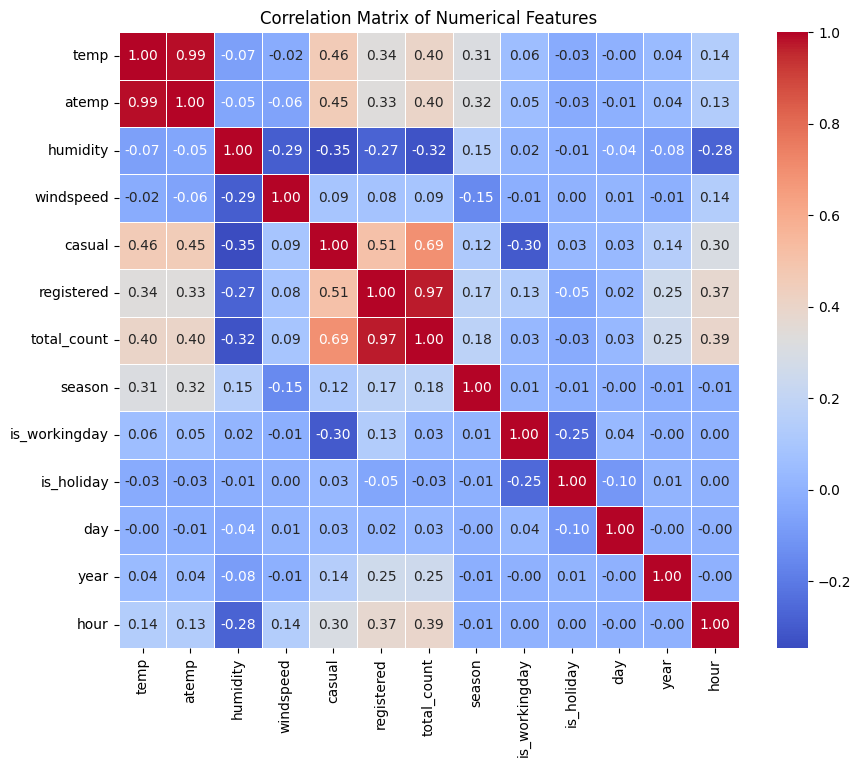

In [245]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Insight:**
-  cuaca yang memiliki nilai rata rata dari total_peminjam tertinggi ada di  cuaca 1
-  cuaca yang memiliki nilai maksimal dari total_peminjam tertinggi ada di  cuaca 1


- Waktu yang memiliki nilai rata rata dari total peminjam tertinggi ada di Waktu Evening

- Waktu yang memiliki nilai maksimal dari total peminjam tertinggi ada di Waktu night

- hari kerja atau tidak yang memiliki nilai rata rata dari total peminjam tertinggi ada di hari kerja
- hari kerja atau tidak yang memiliki nilai maksimal dari total peminjam tertinggi ada di hari kerja

- tanggal merah atau tidak yang memiliki nilai rata rata dari total peminjam tertinggi ada di tidak
- tanggal merah atau tidak yang memiliki nilai maksimal dari total peminjam tertinggi ada di tidak


- hari yang memiliki nilai rata rata dari total peminjam tertinggi ada di hari kamis
- hari yang memiliki nilai maksimal dari total peminjam tertinggi ada di rabu


- hari yang memiliki nilai rata rata dari total peminjam tertinggi ada di hari kamis
- hari yang memiliki nilai maksimal dari total peminjam tertinggi ada di rabu

- musim yang memiliki nilai rata rata dari total peminjam tertinggi ada di musim 3
- musim yang memiliki nilai maksimal dari total peminjam tertinggi ada di musim 3

- tahun yang memiliki nilai rata rata dari total peminjam tertinggi ada di tahun 2012
-tahun yang memiliki nilai maksimal dari total peminjam tertinggi ada di tahun 2012

- bulan yang memiliki nilai rata rata dari total peminjam tertinggi ada di bulan 9
-bulan yang memiliki nilai maksimal dari total peminjam tertinggi ada di bulan 9


- bulan di tahun 2011 yang memiliki nilai rata rata dari total peminjam tertinggi ada di bulan 6
-bulan di tahun 2011 yang memiliki nilai maksimal dari total peminjam tertinggi ada di bulan 8

- bulan di tahun 2012 yang memiliki nilai rata rata dari total peminjam tertinggi ada di bulan 9
-bulan di tahun 2012 yang memiliki nilai maksimal dari total peminjam tertinggi ada di bulan 9


## Visualization & Explanatory Analysis

### Pertanyaan 1:

## Analisis Lanjutan (Opsional)

### Klustering Analis

In [246]:
# Clustering berdasarkan temperature
def temp_cluster(row):
    if row['temp'] < 0.3:
        return 'Low Temp'
    elif 0.3 <= row['temp'] < 0.7:
        return 'Medium Temp'
    else:
        return 'High Temp'

# Clustering berdasarkan humidity
def humidity_cluster(row):
    if row['humidity'] < 0.4:
        return 'Low Humidity'
    elif 0.4 <= row['humidity'] < 0.7:
        return 'Medium Humidity'
    else:
        return 'High Humidity'

# Clustering berdasarkan windspeed
def windspeed_cluster(row):
    if row['windspeed'] < 0.2:
        return 'Low Wind'
    elif 0.2 <= row['windspeed'] < 0.5:
        return 'Medium Wind'
    else:
        return 'High Wind'

def season_cluster(row):
  if row['season'] == 1:
    return 'Spring Season'
  elif row['season'] == 2:
    return 'Summer Season'
  elif row['season'] == 3:
    return 'Fall Season'
  else:
    return 'Winter Season'

def weather_cluster(row):
  if row['weather_condition'] == 1:
    return 'clear weather'
  elif row['weather_condition'] == 2:
    return 'Mist Weather'
  elif row['weather_condition'] == 3:
    return 'Light Weather'
  else:
    return  'Heavy Weather'

def is_holiday_cluster(row):
  if row['is_holiday'] == 1:
    return 'Holiday'
  else:
    return 'Not Holiday'
def is_workingday_cluster(row):
  if row['is_workingday'] == 1:
    return 'Workingday'
  else:
    return 'Not Workingday'

def day_cluster(row):
  if row['day'] == 0:
    return 'Minggu'
  elif row['day'] == 1:
    return 'Senin'
  elif row['day'] == 2:
    return 'Selasa'
  elif row['day'] == 3:
    return 'Rabu'
  elif row['day'] == 4:
    return 'Kamis'
  elif row['day'] == 5:
    return 'Jumat'
  else:
    return 'Sabtu'


# Menambahkan kolom cluster berdasarkan suhu, kelembapan, dan kecepatan angin
hour_df['temp_cluster'] = hour_df.apply(temp_cluster, axis=1)
hour_df['humidity_cluster'] = hour_df.apply(humidity_cluster, axis=1)
hour_df['windspeed_cluster'] = hour_df.apply(windspeed_cluster, axis=1)
hour_df['season_cluster'] = hour_df.apply(season_cluster, axis=1)
hour_df['weather_cluster'] = hour_df.apply(weather_cluster, axis=1)
hour_df['is_holiday_cluster'] = hour_df.apply(is_holiday_cluster, axis=1)
hour_df['is_workingday_cluster'] = hour_df.apply(is_workingday_cluster, axis=1)
hour_df['day_cluster'] = hour_df.apply(day_cluster, axis=1)


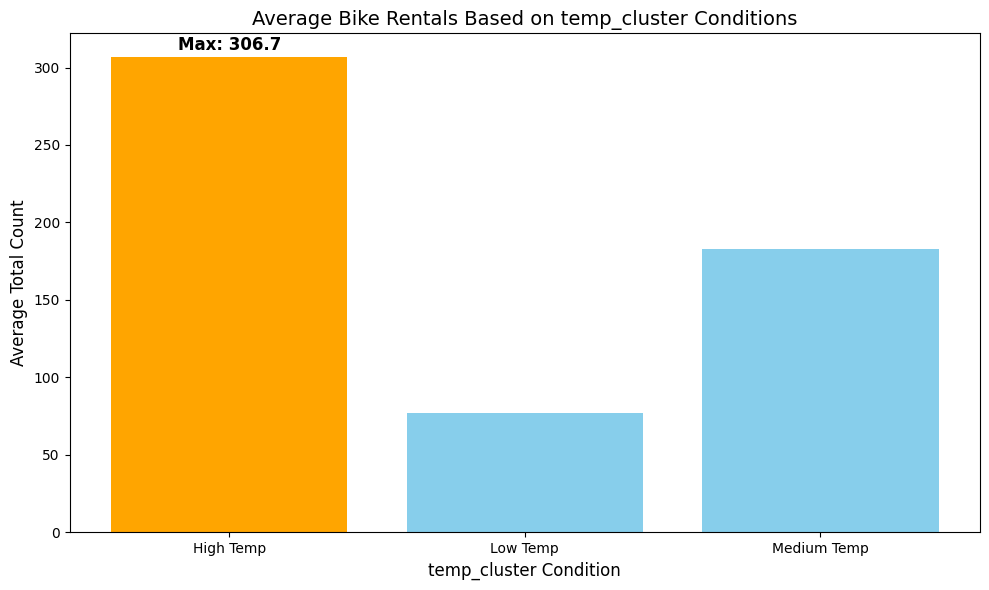

In [247]:

# Calculate the average bike rentals based on temp_cluster conditions
mean_total_count = hour_df.groupby('temp_cluster')['total_count'].mean()

# Determine the maximum value and its corresponding temp_cluster condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on temp_cluster Conditions', fontsize=14)
plt.xlabel('temp_cluster Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


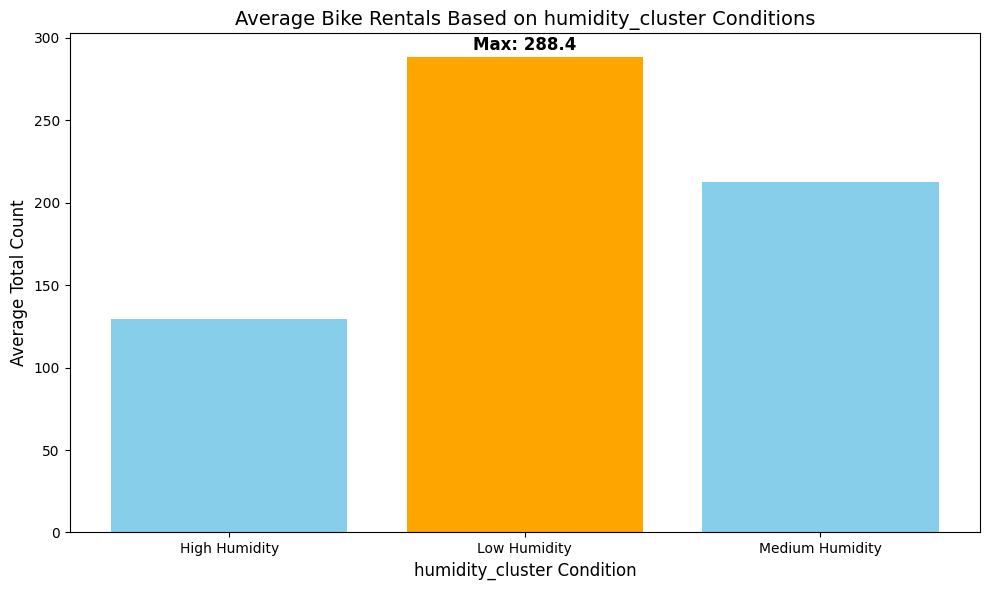

In [248]:

# Calculate the average bike rentals based on humidity_cluster conditions
mean_total_count = hour_df.groupby('humidity_cluster')['total_count'].mean()

# Determine the maximum value and its corresponding humidity_cluster condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on humidity_cluster Conditions', fontsize=14)
plt.xlabel('humidity_cluster Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


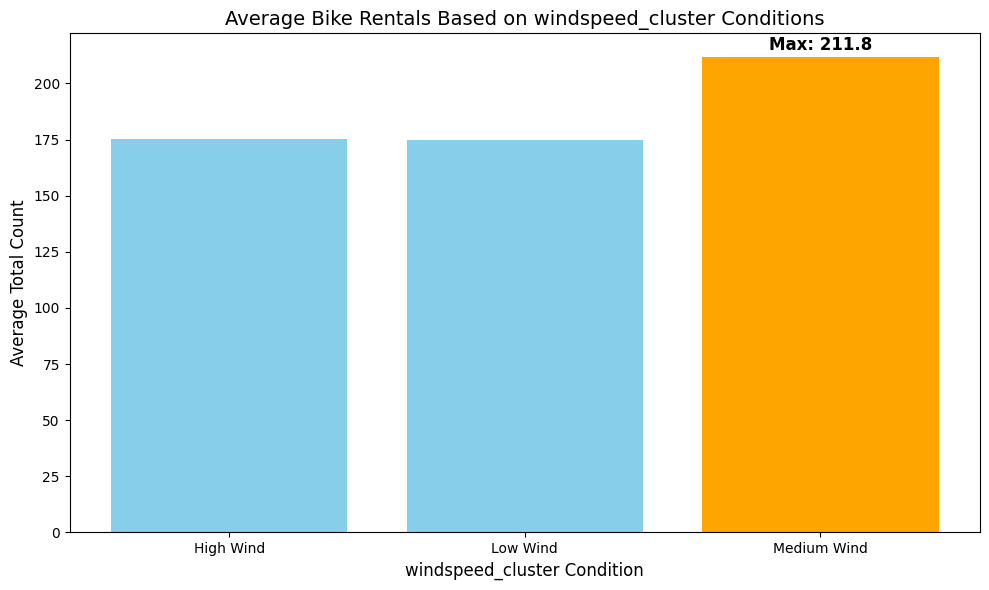

In [249]:

# Calculate the average bike rentals based on windspeed_cluster conditions
mean_total_count = hour_df.groupby('windspeed_cluster')['total_count'].mean()

# Determine the maximum value and its corresponding windspeed_cluster condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on windspeed_cluster Conditions', fontsize=14)
plt.xlabel('windspeed_cluster Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


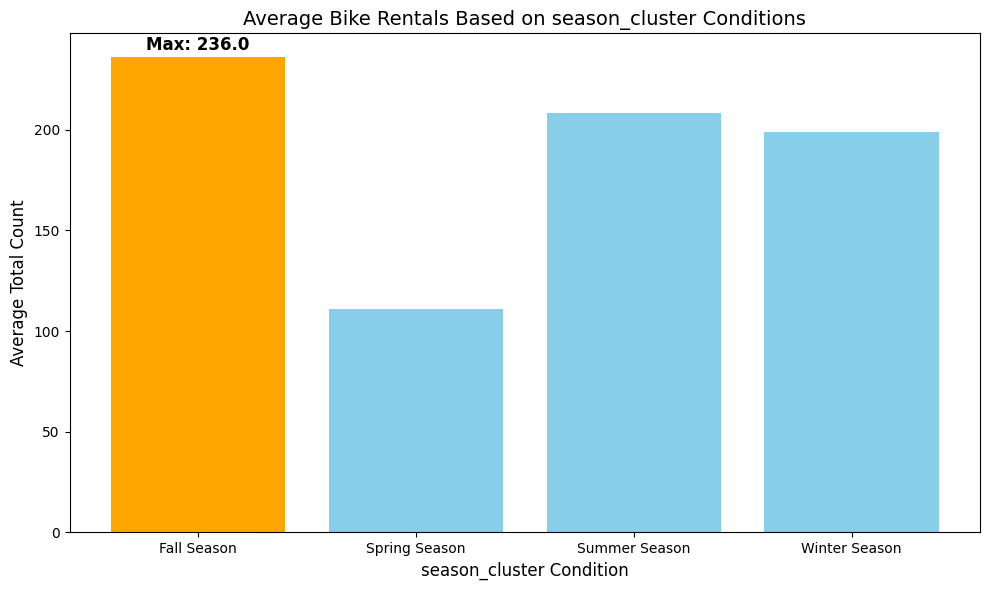

In [250]:

# Calculate the average bike rentals based on season_cluster conditions
mean_total_count = hour_df.groupby('season_cluster')['total_count'].mean()

# Determine the maximum value and its corresponding season_cluster condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on season_cluster Conditions', fontsize=14)
plt.xlabel('season_cluster Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


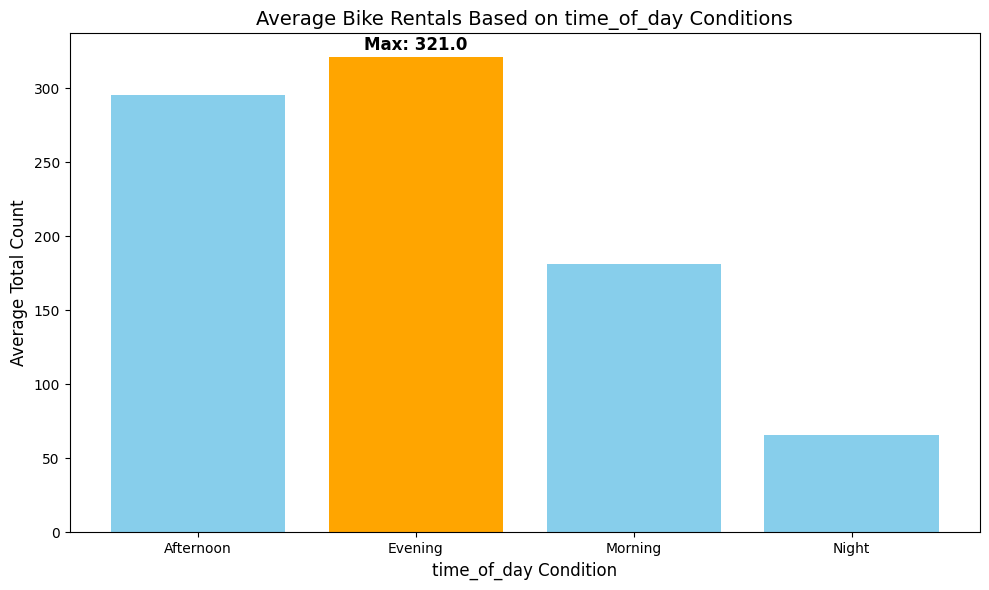

In [251]:

# Calculate the average bike rentals based on time_of_day conditions
mean_total_count = hour_df.groupby('time_of_day')['total_count'].mean()

# Determine the maximum value and its corresponding time_of_day condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on time_of_day Conditions', fontsize=14)
plt.xlabel('time_of_day Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


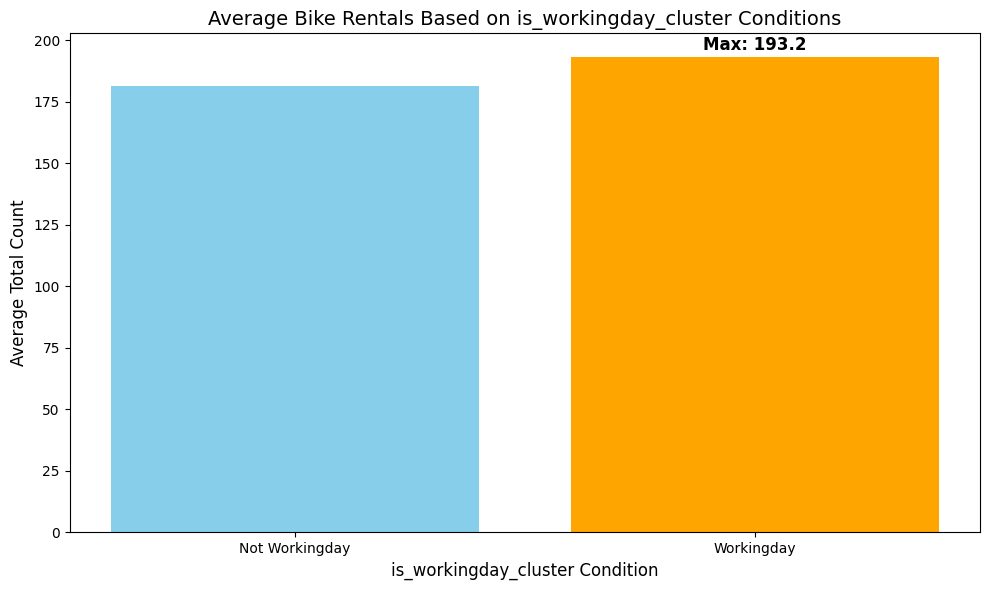

In [252]:

# Calculate the average bike rentals based on is_workingday_cluster conditions
mean_total_count = hour_df.groupby('is_workingday_cluster')['total_count'].mean()

# Determine the maximum value and its corresponding is_workingday_cluster condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on is_workingday_cluster Conditions', fontsize=14)
plt.xlabel('is_workingday_cluster Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


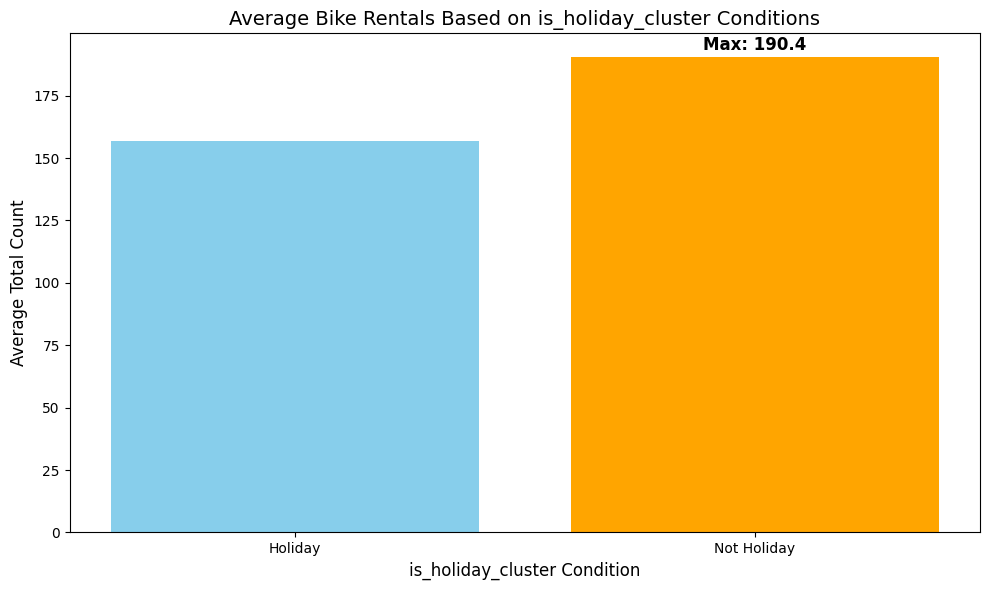

In [253]:

# Calculate the average bike rentals based on is_holiday_cluster conditions
mean_total_count = hour_df.groupby('is_holiday_cluster')['total_count'].mean()

# Determine the maximum value and its corresponding is_holiday_cluster condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on is_holiday_cluster Conditions', fontsize=14)
plt.xlabel('is_holiday_cluster Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


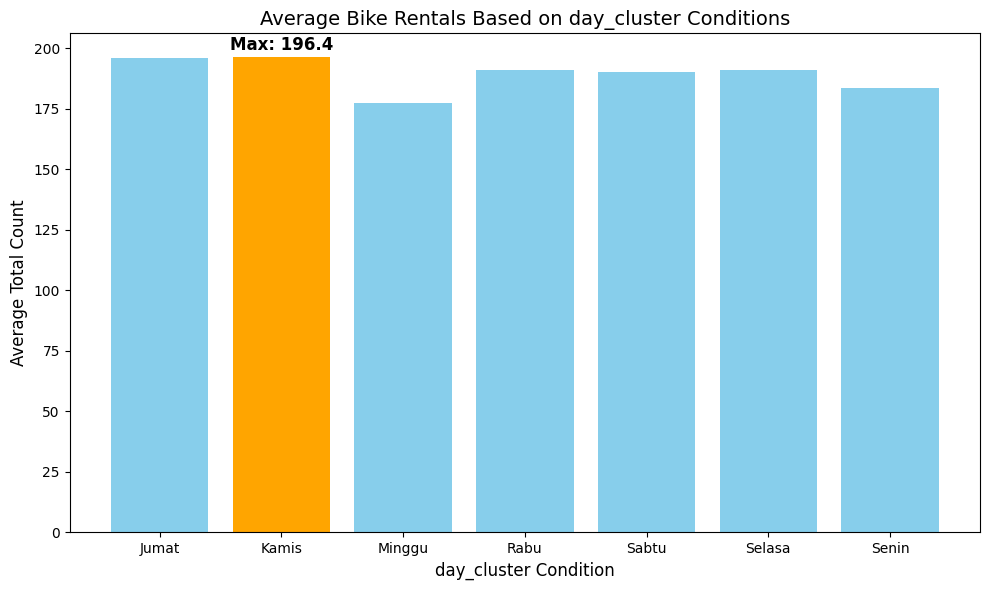

In [254]:

# Calculate the average bike rentals based on day_cluster conditions
mean_total_count = hour_df.groupby('day_cluster')['total_count'].mean()

# Determine the maximum value and its corresponding day_cluster condition
max_value = mean_total_count.max()
max_condition = mean_total_count.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange' if condition == max_condition else 'skyblue' for condition in mean_total_count.index]
bars = plt.bar(mean_total_count.index, mean_total_count.values, color=colors)

# Add annotations for the highest value
plt.annotate(f'Max: {max_value:.1f}',
             xy=(mean_total_count.idxmax(), max_value),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             color='black',
             fontsize=12,
             fontweight='bold')

# Set titles and labels
plt.title('Average Bike Rentals Based on day_cluster Conditions', fontsize=14)
plt.xlabel('day_cluster Condition', fontsize=12)
plt.ylabel('Average Total Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Pertanyaan 2:

###Time Frame Analyst

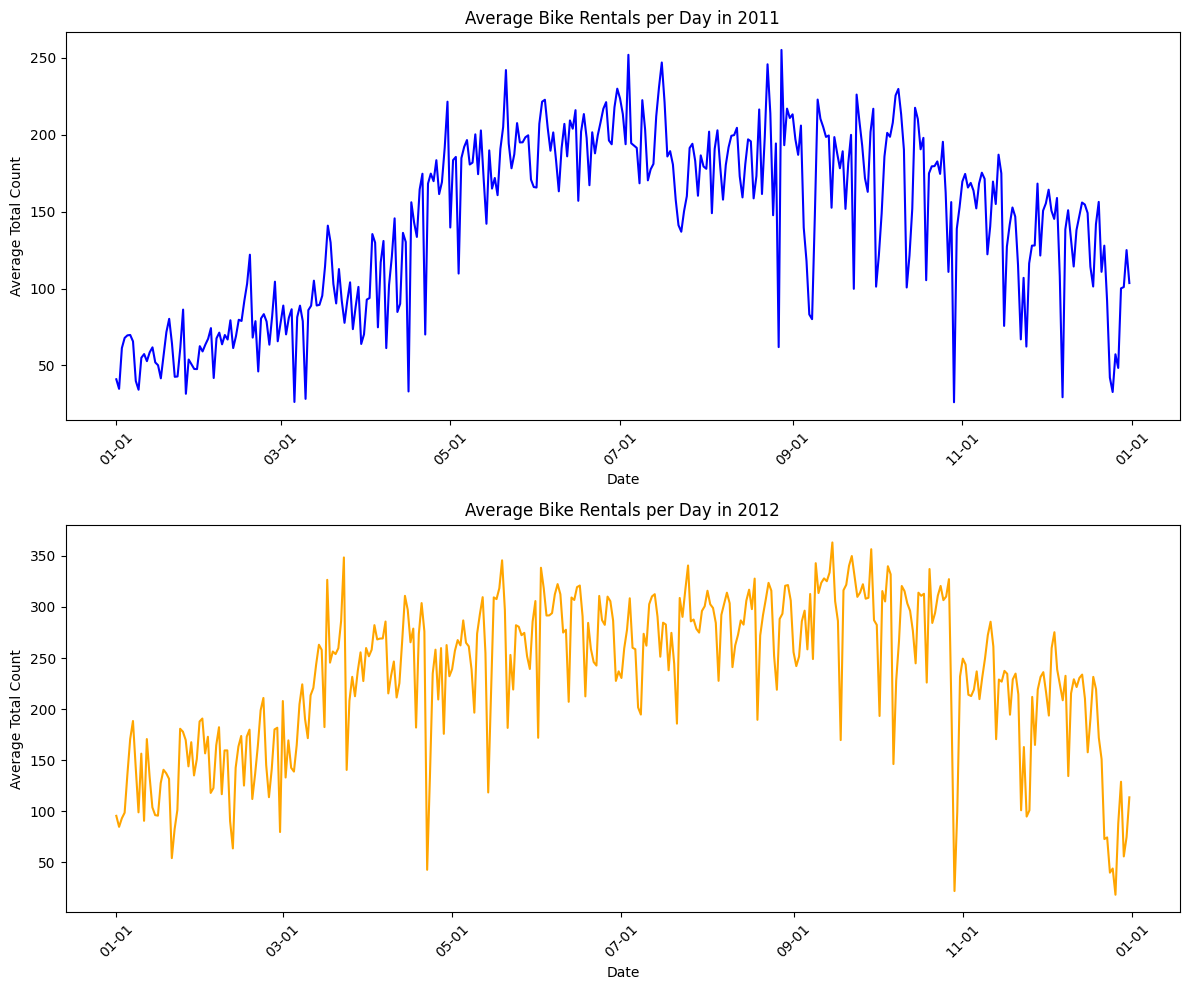

In [255]:

# Format hanya bulan-hari (MM-DD)
date_formatter = mdates.DateFormatter('%m-%d')

# Group by date and calculate the average total count for both years
daily_average_2011 = df_2011.groupby('date')['total_count'].mean()
daily_average_2012 = df_2012.groupby('date')['total_count'].mean()

# Create a figure with two subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12, 10))

# Plot for 2011 on the first subplot
ax1.plot(daily_average_2011.index, daily_average_2011.values, label='2011', color='blue')
ax1.set_title('Average Bike Rentals per Day in 2011')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Total Count')
ax1.xaxis.set_major_formatter(date_formatter)
ax1.tick_params(axis='x', rotation=45)

# Plot for 2012 on the second subplot
ax2.plot(daily_average_2012.index, daily_average_2012.values, label='2012', color='orange')
ax2.set_title('Average Bike Rentals per Day in 2012')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Total Count')
ax2.xaxis.set_major_formatter(date_formatter)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-256-0597c964da7d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['month'] = df_2011['date'].dt.strftime('%m')
<ipython-input-256-0597c964da7d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['month'] = df_2012['date'].dt.strftime('%m')


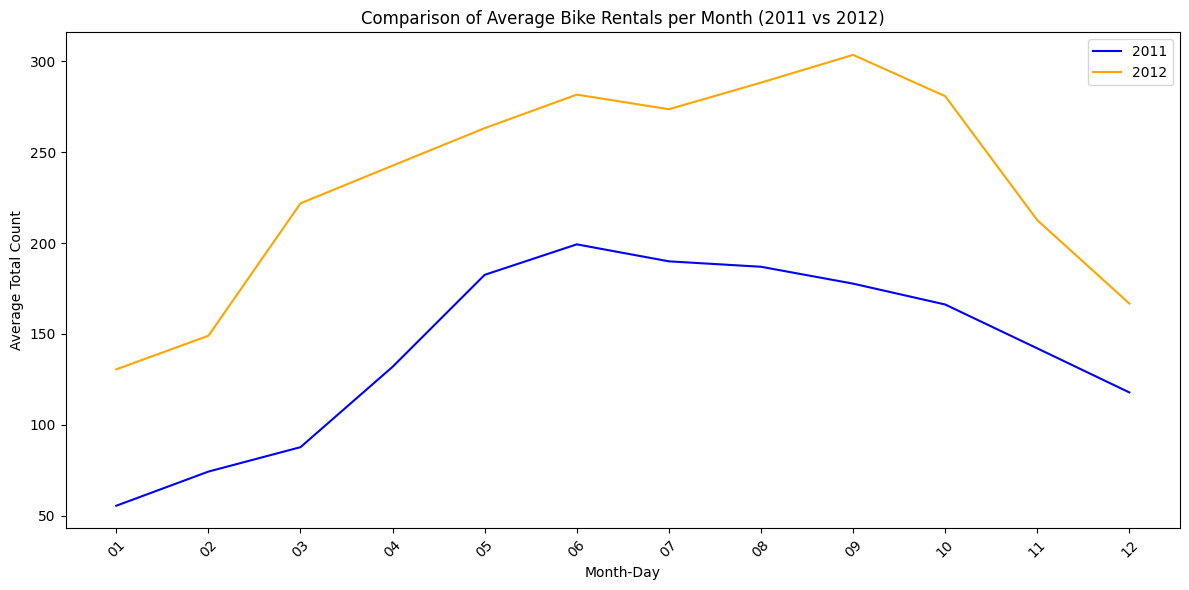

In [256]:
# prompt: membandingkan rata rata total_count perhari di dalam pada df_2011 dan df_2012 dihapus tahun nya pada date dalam satu frame

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_2011 and df_2012 are already defined as in your provided code

# Extract the month and day from the 'date' column for both DataFrames
df_2011['month'] = df_2011['date'].dt.strftime('%m')
df_2012['month'] = df_2012['date'].dt.strftime('%m')

# Group by month and calculate the average total_count for both years
daily_average_2011 = df_2011.groupby('month')['total_count'].mean()
daily_average_2012 = df_2012.groupby('month')['total_count'].mean()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average total_count for both years on the same axes
ax.plot(daily_average_2011.index, daily_average_2011.values, label='2011', color='blue')
ax.plot(daily_average_2012.index, daily_average_2012.values, label='2012', color='orange')

# Customize the plot
ax.set_title('Comparison of Average Bike Rentals per Month (2011 vs 2012)')
ax.set_xlabel('Month-Day')
ax.set_ylabel('Average Total Count')
ax.tick_params(axis='x', rotation=45)
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Kluster Analyst

In [257]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rec_id                 17379 non-null  int64         
 1   date                   17379 non-null  datetime64[ns]
 2   season                 17379 non-null  int64         
 3   year                   17379 non-null  int64         
 4   month                  17379 non-null  int64         
 5   hour                   17379 non-null  int64         
 6   is_holiday             17379 non-null  int64         
 7   day                    17379 non-null  int64         
 8   is_workingday          17379 non-null  int64         
 9   weather_condition      17379 non-null  int64         
 10  temp                   17379 non-null  float64       
 11  atemp                  17379 non-null  float64       
 12  humidity               17379 non-null  float64       
 13  w

**Insight:**
- Keadaan Cuaca, Musim, waktu, hari kerja atau tidak, hari libur atau tidak , mempengaruhi jumlah perental
- awal tahun dan ahkir tahun mengalami penurunan perental karena pada awal tahun dan akhir tahun adalah dimana bertepatan dengan hari raya rantal sehingga akan ada liburan di awal tahun dan akhir tahun

#Conclution pertanyaan 1
Pengaruh Faktor Eksternal terhadap Penyewaan Sepeda

- Cuaca cerah (clear) mendorong peningkatan jumlah penyewa sepeda dibandingkan cuaca lain.
- Musim gugur (fall) memiliki rata-rata penyewa tertinggi di antara musim lainnya.
- Waktu paling ramai untuk penyewaan adalah evening (18.00–21.00).
- Hari kerja dan hari tidak libur menunjukkan jumlah penyewa lebih tinggi dibandingkan hari libur atau akhir pekan.
- Kamis merupakan hari dengan penyewaan tertinggi di antara hari lainnya.
- Medium Wind Speed merupakan kondisi
- Temperatur tinggi di atas 29°C berkorelasi dengan peningkatan rata-rata penyewa.
- Kelembapan rendah (low humidity) meningkatkan jumlah penyewa sepeda.
- Kecepatan angin sedang (medium windspeed) memberikan kondisi ideal bagi penyewaan sepeda.
#Conclution pertanyaan 2
Lonjakan dan Penurunan Penyewaan

Lonjakan penyewaan terjadi terutama pada hari kerja dan waktu malam, saat orang-orang lebih aktif dan memiliki kebutuhan rekreasi.
Penurunan penyewaan terjadi pada akhir tahun hingga awal tahun karena liburan Natal dan aktivitas masyarakat berkurang, sehingga perlu disesuaikan dengan pengelolaan stok sepeda untuk menghindari kelebihan atau kekurangan.

Penyedia sepeda dapat mengoptimalkan stok dengan fokus pada jam malam, hari kerja, dan cuaca cerah, serta mengurangi persediaan menjelang liburan akhir tahun.